In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
from scipy import stats as stats

In [2]:
sns.set(rc={'axes.facecolor':'#23272e', 'figure.facecolor':'#23272e', 'axes.grid' : False})
sns.set_palette('Pastel2')

In [3]:
tfm = lambda x: np.exp(x) / (np.exp(x) + 1)

In [4]:
cmap = sns.color_palette("dark:#6666ff", as_cmap=True)
cmap2 = sns.color_palette("light:#ffe0b3", as_cmap=True)
cmap3 = sns.color_palette("dark:#ffe0b3", as_cmap=True)

(-4.0, 4.0, -4.0, 4.0)

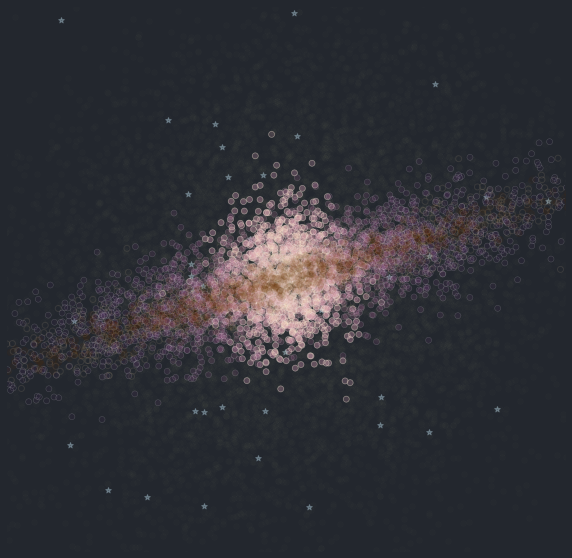

In [5]:
disk = np.random.multivariate_normal((0, 0), np.array([[3.2, 0.9],[0.4, 0.3]]), size=2500)
disk2 = np.random.multivariate_normal((0, 0), np.array([[2.5, 0.75],[0.75, 0.3]]), size=2000)
bulge = np.random.multivariate_normal((0, 0), np.array([[0.2, 0],[0, 0.3]]), size=1000)
halo = np.random.multivariate_normal((0, 0), np.array([[3, 0.5],[0.5, 3]]), size=10000)
streak = np.random.multivariate_normal((0, 0), np.array([[3.2, 1],[0.4, 0.15]]), size=1000)
stars = np.random.multivariate_normal((0, 0), np.array([[6, 0.5],[0.5, 6]]), size=50)

gaussian = lambda x, mu=0, sigma=1: stats.norm(mu, sigma).pdf(x)
x = np.linspace(-10, 10, 1000)
g0 = gaussian(x, 0, 0.92)
g1 = gaussian(x, 0, 2)
g2 = gaussian(x, 0, 3)
y1 = (np.sin(x) + np.cos(x)**2 + np.cosh(x)**(-0.2) + np.random.normal(0, 0.1)) * 0.7
y2 = (np.cos(x) + (np.sin(x) + np.cos(x))**2 + np.cosh(x)**-0.1 + np.random.normal(0, 0.1)) * 0.5

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
sns.scatterplot(bulge[:, 0], bulge[:, 1], alpha=0.4, x_jitter=True, y_jitter=True, ax=ax, hue=tfm(np.sqrt(np.square(bulge).sum(axis=1))), cmap=cmap2)
ax.scatter(stars[:int(len(stars) / 2), 0], stars[:int(len(stars) / 2), 1], alpha=0.3, c='#cceeff', marker='*')
ax.scatter(halo[:, 0], halo[:, 1], alpha=0.01, c="#ffffcc")
ax.scatter(stars[int(len(stars) / 2):, 0], stars[int(len(stars) / 2):, 1], alpha=0.3, c='#cceeff', marker="*")
ax.scatter(bulge[:, 0], bulge[:, 1], alpha=0.15, c=cmap2(tfm(np.sqrt(np.square(bulge).sum(axis=1)))))
ax.scatter(disk2[:, 0], disk2[:, 1], alpha=0.1, edgecolor=cmap3(tfm(np.sqrt(np.square(disk2).sum(axis=1)))), facecolor='none')
sns.scatterplot(disk[:, 0], disk[:, 1], alpha=0.2, x_jitter=True, y_jitter=True, ax=ax, hue=tfm(np.sqrt(np.square(disk).sum(axis=1))), cmap=cmap)
ax.scatter(streak[:, 0], streak[:, 1], alpha=0.05, c='#804000')
ax.scatter(streak[:, 0] + np.random.normal(0, 0.01, len(streak)), streak[:, 1] + np.random.normal(0, 0.01, len(streak)), alpha=0.03, c='#4d2600')

ax.legend([], [], frameon=False)
ax.axis('off')

# yshift = -3.
# yscale = 14
# plt.plot(x, yscale * g0 + yshift, c="#5E81AC", lw=100)
# plt.plot(x, yscale * g1 + yshift, c="#8FBCBB", lw=25)
# plt.plot(x, yscale * (g0 * g1) + yshift, c="#A3BE8C", lw=25)
# ax.annotate("Astrostatistics\nResearch Team", xy=(0.5, 0.05), xycoords='axes fraction', ha='center', color='#D8DEE9', fontsize=35, family='serif');

# ax.annotate("J  S", xy=(0.5, 0.4), xycoords='axes fraction', ha='center', color='white', fontsize=350, family='serif', alpha=0.5);

plt.savefig('./logo.svg', dpi=400)
